In [1]:
# ODE simulations

In [2]:
from __future__ import print_function, division
import pandas as pd
from pprint import pprint
import tellurium as te

In [3]:
# load model
source = './results/diauxic_bounds.xml'
r = te.loads(source)
r.timeCourseSelections += r.getGlobalParameterIds()

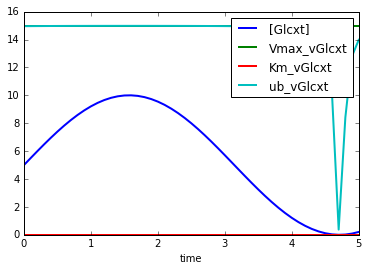

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [5]:
s = r.simulate()
r.plot()

In [6]:
s

    time,     [Glcxt], Vmax_vGlcxt, Km_vGlcxt, ub_vGlcxt
 [[    0,           5,          15,     0.015,   14.9551],
  [  0.1,     5.49917,          15,     0.015,   14.9592],
  [  0.2,     5.99335,          15,     0.015,   14.9626],
  [  0.3,      6.4776,          15,     0.015,   14.9653],
  [  0.4,     6.94709,          15,     0.015,   14.9677],
  [  0.5,     7.39713,          15,     0.015,   14.9696],
  [  0.6,     7.82321,          15,     0.015,   14.9713],
  [  0.7,     8.22109,          15,     0.015,   14.9727],
  [  0.8,     8.58678,          15,     0.015,   14.9738],
  [  0.9,     8.91663,          15,     0.015,   14.9748],
  [    1,     9.20735,          15,     0.015,   14.9756],
  [  1.1,     9.45604,          15,     0.015,   14.9762],
  [  1.2,      9.6602,          15,     0.015,   14.9767],
  [  1.3,     9.81779,          15,     0.015,   14.9771],
  [  1.4,     9.92725,          15,     0.015,   14.9774],
  [  1.5,     9.98747,          15,     0.015,   14.9775],